# Сергей Зотов AIN-2-22 Лабораторная работа №6

## Примеры

#### Перекрестная проверка

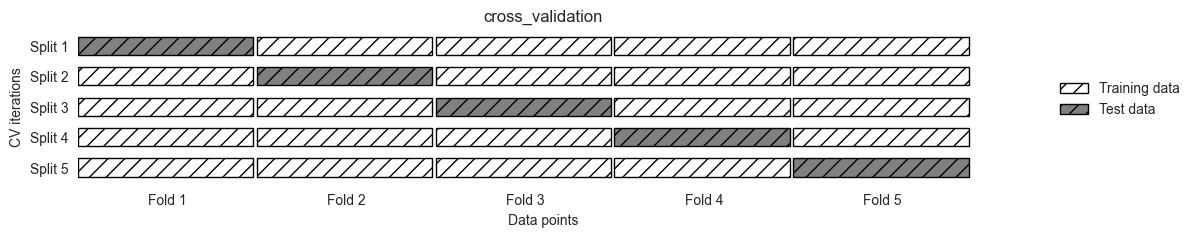

In [2]:
import mglearn

mglearn.plots.plot_cross_validation()

#### Перекрестная проверка в scikit-learn

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [4]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


Наиболее распространенный способ подытожить правильность, вычисленную в ходе перекрестной проверки, – это вычисление среднего значения

In [5]:
print("Средняя правильность перекрестной проверки {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки 0.97


#### Преимущества перекрестной проверки

1. Стабильность оценки
Перекрестная проверка устраняет случайность разбиения данных
Разные примеры попадают в тестовые наборы, что обеспечивает более объективную оценку модели
2. Обобщение модели
Модель тестируется на разных подвыборках данных, что помогает оценить её способность обобщать данные
и предсказывать на новых данных
3. Оценка чувствительности
Разброс метрик (например, правильности) между итерациями показывает, как модель реагирует на изменения обучающего набора
4. Более эффективное использование данных
Перекрестная проверка использует больше данных для обучения (80-90%),
чем однократное разбиение (75%), что обычно улучшает качество модели

#### Недостатки перекрестной модели

Увеличение вычислительных затрат
Перекрестная проверка требует обучения 𝑘 моделей вместо одной
Это увеличивает время выполнения примерно в 𝑘 раз по сравнению с однократным разбиением данных

#### Пример для датасета iris

In [6]:
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.0079999 , 0.00898123, 0.0080204 , 0.00700045, 0.00700021]),
 'score_time': array([0.00099993, 0.00100112, 0.        , 0.00101233, 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [7]:
import pandas as pd

res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.008000,0.001000,0.966667,0.966667
1,0.008981,0.001001,1.000000,0.966667
2,0.008020,0.000000,0.933333,0.983333
3,0.007000,0.001012,0.966667,0.983333
4,0.007000,0.000000,1.000000,0.975000


Mean times and scores:
 fit_time       0.007800
score_time     0.000603
test_score     0.973333
train_score    0.975000
dtype: float64


#### Стратифицированная k-блочная перекрестная проверка и другие стратегии

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()
print("Метки ирисов:\n{}".format(iris.target))

Метки ирисов:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


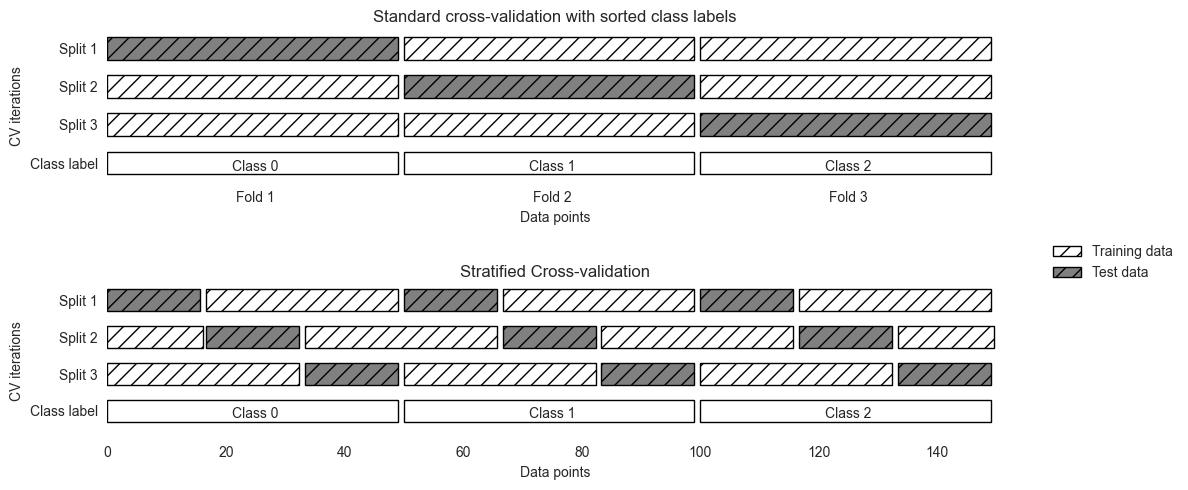

In [9]:
mglearn.plots.plot_stratified_cross_validation()

#### Больше контроля над перекрестной проверкой


Параметр cv в cross_val_score настраивает количество блоков или использует генератор разбиений, например, KFold, для кастомизации перекрестной проверки

In [10]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

генератор разбиений kfold в качестве параметра cv в функцию cross_val_score

In [11]:
print("Значения правильности перекрестной проверки:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[1.         1.         0.86666667 0.93333333 0.83333333]


Таким образом, мы можем убедиться, что использование трехблочной (нестратифицированной) перекрестной проверки для набора данных iris
действительно является очень плохой идеей:

In [12]:
kfold = KFold(n_splits=3)
print("Значения правильности перекрестной проверки:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[0. 0. 0.]


In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

print("Значения правильности перекрестной проверки:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[0.98 0.96 0.96]


#### Перекрестная проверка с исключением по одному

Метод исключения по одному (leave-one-out) — это перекрестная проверка, где каждый пример становится отдельным тестовым набором. Она может быть вычислительно затратной на больших данных, но дает точные оценки на небольших наборах

In [14]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
score = cross_val_score(logreg, iris.data, iris.target, cv=loo)

print("Количество итераций: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций:  5
Средняя правильность: 0.97


#### Перекрестная проверка со случайными перестановками при разбиении

Перекрестная проверка с перестановками (shuffle-split) случайно выбирает точки для обучающего и тестового наборов, повторяя разбиение
n раз. Размеры наборов задаются через train_size и test_size, как абсолютными значениями, так и долями от общей выборки

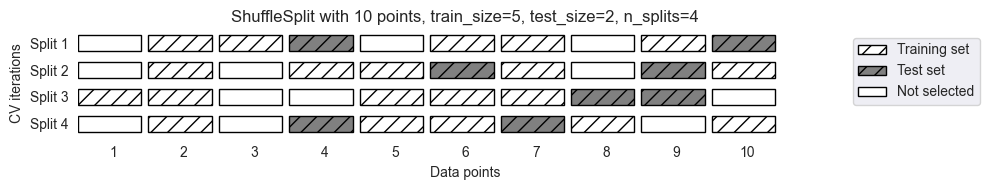

In [15]:
mglearn.plots.plot_shuffle_split()

Рис. Перекрестная проверка со случайными перестановками при разбиении для набора данных из 10 точек, train_size=5, test_size=2 и n_iter=4

Программный код, приведенный ниже, 10 раз разбивает данные на 50%-ный обучающий набор и 50%-ный тестовый набор:

In [16]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[0.94666667 1.         0.96       0.97333333 0.96       0.93333333
 0.98666667 0.97333333 0.93333333 0.90666667]


#### Перекрестная проверка с использованием групп

In [17]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

# создаем синтетический набор данных
X, y = make_blobs(n_samples=12, random_state=0)

# предполагаем, что первые три примера относятся к одной и той же группе,
# затем следующие четыре и так далее.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3]

scores = cross_val_score(logreg, X, y, groups=groups, scoring=None, cv=GroupKFold(n_splits=3))
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[0.75       0.6        0.66666667]


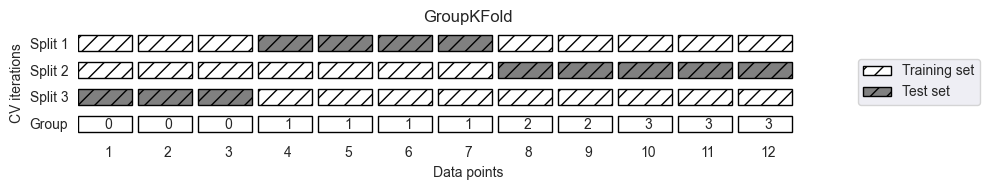

In [18]:
mglearn.plots.plot_group_kfold()

#### Решетчатый поиск

Оптимизация параметров модели, например gamma и C в SVM с RBF-ядром, выполняется через решетчатый поиск (grid search). Он перебирает все возможные комбинации значений параметров. Например, если задать значения C и gamma как [0.001, 0.01, 0.1, 1, 10, 100], то получится 6 × 6 = 36 комбинаций. Эти комбинации проверяются, чтобы найти лучшие настройки.

<img src='img.png' width='800'>

#### Простой решетчатый поиск

Мы можем реализовать простой решетчатый поиск с помощью вложенных циклов for по двум параметрам, обучая и оценивая классификатор для каждой комбинации:

In [19]:
# реализация наивного решетчатого поиска
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print("Размер обучающего набора: {} размер тестового набора: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров создаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем SVC на тестовом наборе
        score = svm.score(X_test, y_test)
        # если текущий результат лучше, сохраняем параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Наилучшее значение правильности: {:.2f}".format(best_score))
print("Наилучшие значения параметров: {}".format(best_parameters))

Размер обучающего набора: 112 размер тестового набора: 38
Наилучшее значение правильности: 0.97
Наилучшие значения параметров: {'C': 100, 'gamma': 0.001}


#### Опасность переобучения параметров и проверочный набор данных

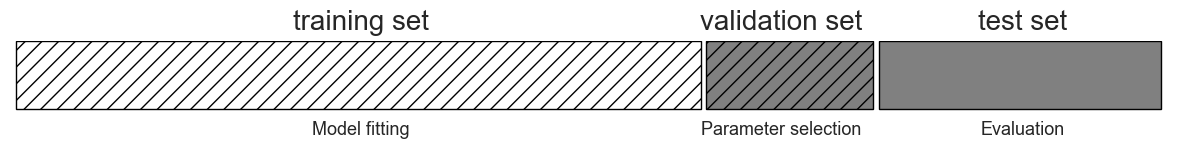

In [20]:
mglearn.plots.plot_threefold_split()

In [21]:
from sklearn.svm import SVC

# разбиваем данные на обучающий+проверочный набор и тестовый набор
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# разбиваем обучающий+проверочный набор на обучающий и проверочный наборы
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:" " {}\n".format(
    X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем качество SVC на тестовом наборе
        score = svm.score(X_valid, y_valid)
        # если получаем наилучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате объединения обучающих
# и проверочных данных, оцениваем качество модели на тестовом наборе
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))

Размер обучающего набора: 84 размер проверочного набора: 28 размер тестового набора: 38

Лучшее значение правильности на проверочном наборе: 0.96
Наилучшие значения параметров:  {'C': 10, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.92


Лучшее значение правильности на проверочном наборе составило 96%, что ниже, чем на тестовом наборе ранее, из-за уменьшения данных для обучения. Тестовая правильность, отражающая реальную обобщающую способность, снизилась до 92%. Это подчеркивает важность разделения данных на обучающий, проверочный и тестовый наборы. Использование тестового набора для выбора параметров может завысить оценку качества модели, поэтому его следует применять только для финальной проверки.

#### Решетчатый поиск с перекрестной проверкой

In [22]:
import numpy as np

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        # выполняем перекрестную проверку
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # вычисляем среднюю правильность перекрестной проверки
        score = np.mean(scores)
        # если получаем лучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# заново строим модель на наборе, полученном в результате
# объединения обучающих и проверочных данных
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

Результаты решетчатого поиска с перекрестной проверкой

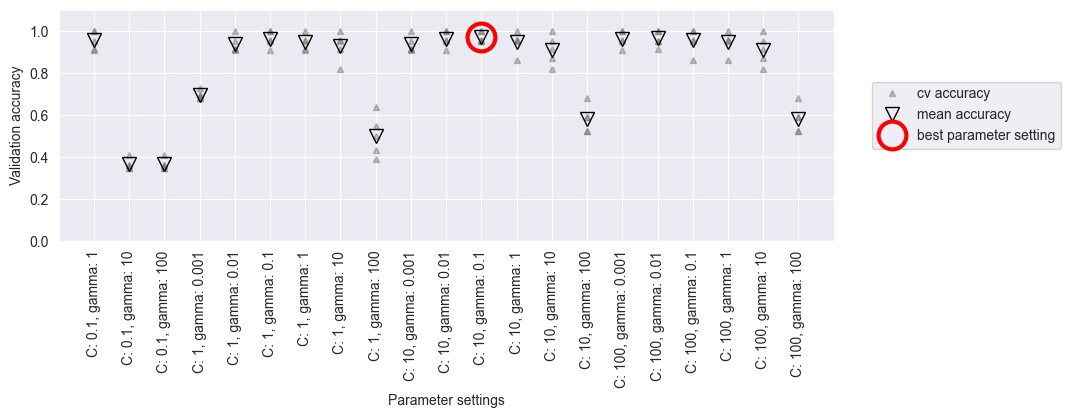

In [23]:
mglearn.plots.plot_cross_val_selection()

Процесс отбора параметров и оценки модели с помощью GridSearchCV

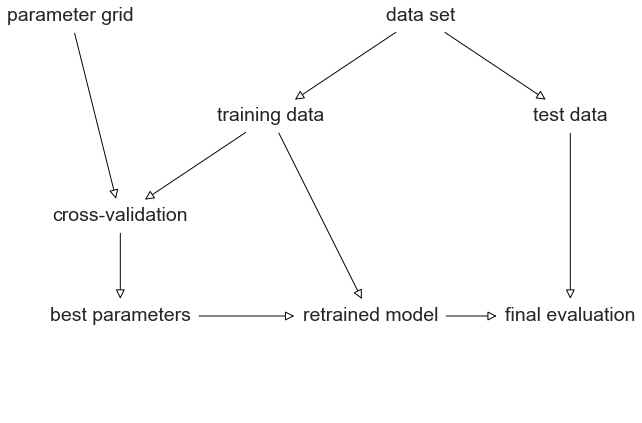

In [24]:
mglearn.plots.plot_grid_search_overview()

In [25]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Сетка параметров:\n{}".format(param_grid))

Сетка параметров:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [28]:
print("Правильность на текстовом наборе: {:.2f}".format(grid_search.score(x_test, y_test)))

Правильность на текстовом наборе: 0.97


In [29]:
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid_search.best_score_))

Наилучшие значения параметров: {'C': 10, 'gamma': 0.1}
Наилучшее значение кросс-валидац. правильности: 0.97


In [30]:
print("Наилучшая модель: \n{}".format(grid_search.best_estimator_))

Наилучшая модель: 
SVC(C=10, gamma=0.1)


#### Анализ результатов перекрестной проверки

In [31]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000999,0.000632,0.000601,0.000490,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000803,0.000401,0.000597,0.000487,0.001,0.010,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000800,0.000400,0.000400,0.000490,0.001,0.100,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000600,0.000490,0.000800,0.000400,0.001,1.000,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000806,0.000403,0.000400,0.000490,0.001,10.000,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


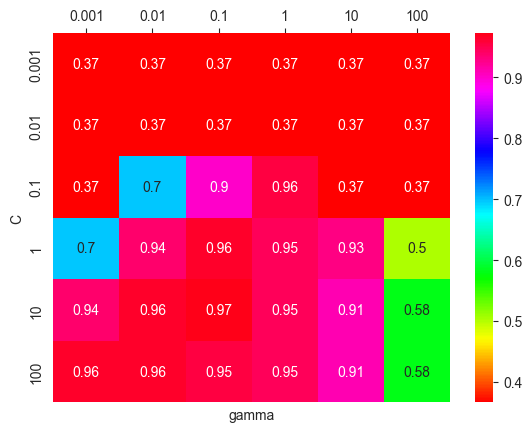

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

scores = np.array(results.mean_test_score).reshape(6, 6)

# строим тепловую карту средних значений правильности перекрестной проверки
ax = sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='hsv')
ax.set(xlabel="gamma", ylabel="C")
ax.xaxis.tick_top()

plt.show()

#### Экономичный решетчатый поиск

In [33]:
param_grid = [
    {'kernel': ['rbf'],
     'C': [0.001, 0.01, 0.1, 1, 10, 100],
     'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'kernel': ['linear'],
     'C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [34]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid_search.best_score_))

Наилучшие значения параметров: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Наилучшее значение кросс-валидац. правильности: 0.97


In [35]:
results = pd.DataFrame(grid_search.cv_results_)

In [36]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001200,4.004003e-04,0.000600,4.901350e-04,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
1,0.000800,3.999949e-04,0.000400,4.898040e-04,0.001,0.010,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
2,0.001000,1.177701e-06,0.000599,4.894735e-04,0.001,0.100,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
3,0.001000,1.016010e-06,0.000600,4.902523e-04,0.001,1.000,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
4,0.000801,4.003086e-04,0.000799,3.995182e-04,0.001,10.000,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
5,0.001000,8.920806e-07,0.000600,4.897461e-04,0.001,100.000,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
6,0.001000,7.294206e-07,0.000403,4.935631e-04,0.010,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
7,0.000797,3.983491e-04,0.000803,4.017142e-04,0.010,0.010,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
8,0.001200,4.002402e-04,0.000800,3.999236e-04,0.010,0.100,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
9,0.001301,6.037239e-04,0.000600,8.007169e-04,0.010,1.000,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27


#### Вложенная перекрестная проверка

In [37]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print("Значения правильности перекрестной проверки: ", scores)
print("Среднее значение правильности перекрестной проверки: ", scores.mean())

Значения правильности перекрестной проверки:  [0.96666667 1.         0.9        0.96666667 1.        ]
Среднее значение правильности перекрестной проверки:  0.9666666666666668


In [38]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # для каждого разбиения данных во внешней перекрестной проверке
    # (метод split возвращает индексы)
    for training_samples, test_samples in outer_cv.split(X, y):
        best_parms = {}
        best_score = -np.inf
        # итерируем по параметрам
        for parameters in parameter_grid:
            # собираем значения правильности по всем внутренним разбиениям
            cv_scores = []
            # итерируем по разбиениям внутренней перекрестной проверки
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # строим классификатор с данными параметрами на внутреннем обучающем наборе
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # оцениваем качество на внутреннем тестовом наборе
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # вычисляем среднее значение правильности по внутренним блокам
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # если лучше, чем предыдущие, запоминаем параметры
                best_score = mean_score
                best_params = parameters
        # строим классификатор с лучшими параметрами на внешнем обучающем наборе
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # оцениваем качество на внешнем тестовом наборе
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [39]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

# Здесь предполагается, что функция `nested_cv` уже реализована и принимает параметры
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))

print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.96666667 1.         0.96666667 0.96666667 1.        ]


#### несбалансированный набор данных с пропорциями 9:1, создав два класса «не-девятка» и «девятка»

In [40]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

x_train, x_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [41]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy="most_frequent").fit(x_train, y_train)
pred_most_frequent = dummy_majority.predict(x_test)

print("Уникальные спрогнозированные метки: {}".format(np.unique(pred_most_frequent)))
print("Правильность на тестовом наборе: {:.2f}".format(dummy_majority.score(x_test, y_test)))

Уникальные спрогнозированные метки: [False]
Правильность на тестовом наборе: 0.90


In [42]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(x_train, y_train)
pred_tree = tree.predict(x_test)

print("Правильность на тестовом наборе: {:.2f}".format(tree.score(x_test, y_test)))

Правильность на тестовом наборе: 0.92


In [43]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(x_train, y_train)
pred_dummy = dummy.predict(x_test)
print("Правильность dummy: {:.2f}".format(dummy.score(x_test, y_test)))

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(x_train, y_train)
pred_logreg = logreg.predict(x_test)
print("Правильность logreg: {:.2f}".format(logreg.score(x_test, y_test)))

Правильность dummy: 0.90
Правильность logreg: 0.98


#### Матрица ошибок

In [44]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


Maтрица ошибок для классификационной задачи «девятка против остальных»

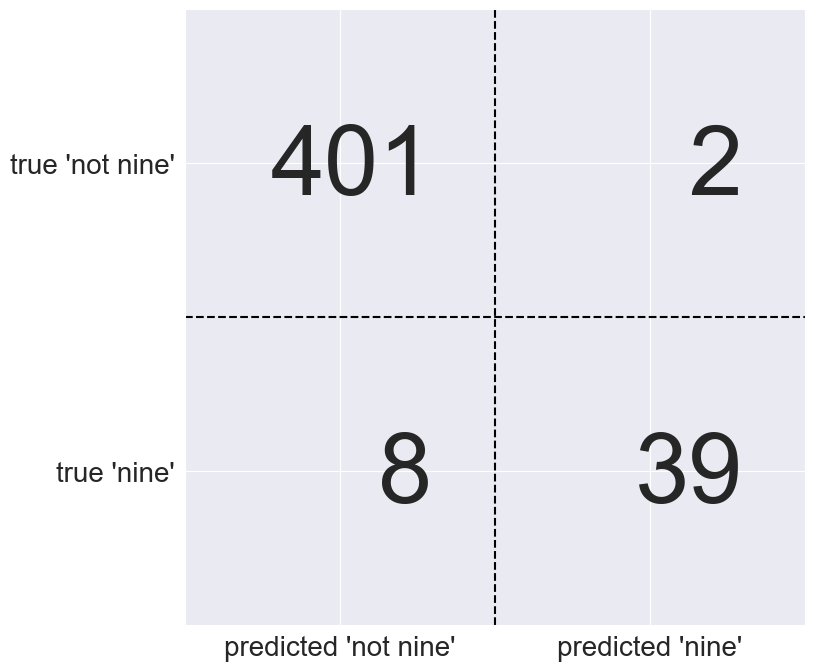

In [45]:
mglearn.plots.plot_confusion_matrix_illustration()

Матрица ошибок для бинарной классификации

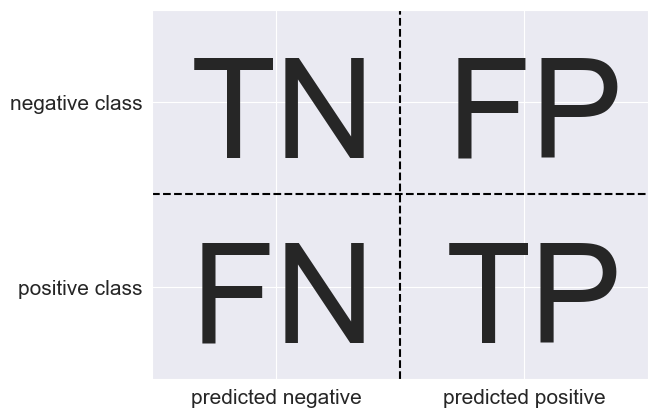

In [46]:
mglearn.plots.plot_binary_confusion_matrix()

In [47]:
from sklearn.metrics import confusion_matrix

print("Наиболее часто встречающийся класс:")
print(confusion_matrix(y_test, pred_most_frequent))

print("\nДамми-модель:")
print(confusion_matrix(y_test, pred_dummy))

print("\nДерево решений:")
print(confusion_matrix(y_test, pred_tree))

print("\nЛогистическая регрессия:")
print(confusion_matrix(y_test, pred_logreg))

Наиболее часто встречающийся класс:
[[403   0]
 [ 47   0]]

Дамми-модель:
[[403   0]
 [ 47   0]]

Дерево решений:
[[390  13]
 [ 24  23]]

Логистическая регрессия:
[[402   1]
 [  6  41]]


In [48]:
from sklearn.metrics import f1_score

print("f1-мера наибольшая частота: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1-мера дамми: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1-мера дерево: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1-мера логистическая регрессия: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1-мера наибольшая частота: 0.00
f1-мера дамми: 0.00
f1-мера дерево: 0.55
f1-мера логистическая регрессия: 0.92


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\Sergey\PycharmProjects\BigData\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sergey\PycharmProjects\BigData\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sergey\PycharmProjects\BigData\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

#### Кривые точности - полноты и ROC-кривые

In [50]:
from mglearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

# Создаем данные
x, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)

# Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Обучение модели SVC
svc = SVC(gamma=0.05).fit(x_train, y_train)

# Вычисление precision, recall и порогов
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(x_test))

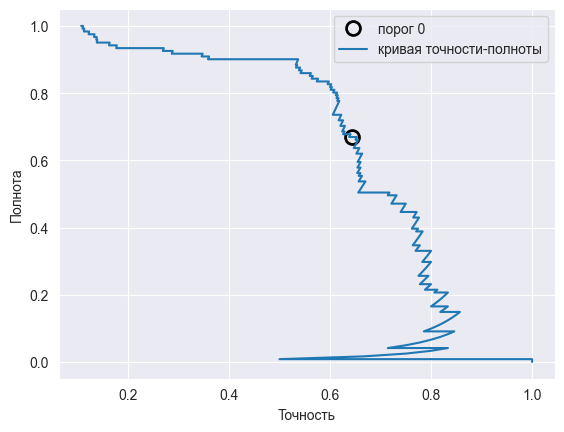

In [51]:
# используем большой объем данных, чтобы получить более гладкую кривую
x, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

svc = SVC(gamma=0.05).fit(x_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(x_test))

# находим ближайший к нулю порог
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="порог 0",
         fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="кривая точности-полноты")
plt.xlabel("Точность")
plt.ylabel("Полнота")
plt.legend(loc="best")
plt.show()


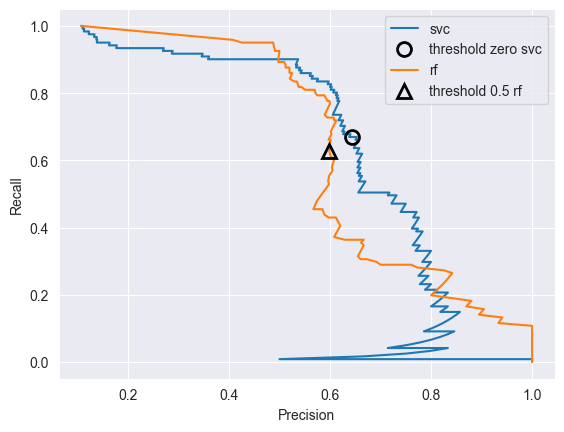

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(x_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(x_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))


plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [53]:
from sklearn.metrics import average_precision_score

# Расчет средней точности для Random Forest и SVC
ap_rf = average_precision_score(y_test, rf.predict_proba(x_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(x_test))

# Вывод результатов
print("Средняя точность Random Forest: {:.3f}".format(ap_rf))
print("Средняя точность SVC: {:.3f}".format(ap_svc))

Средняя точность Random Forest: 0.660
Средняя точность SVC: 0.666


#### Метрики для мультиклассовой классификации

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

# Загрузка набора данных
digits = load_digits()

# Разделение на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0
)

# Обучение модели логистической регрессии
lr = LogisticRegression(max_iter=1000).fit(x_train, y_train)

# Предсказание на тестовом наборе
pred = lr.predict(x_test)

# Вывод точности и матрицы неточности
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))


Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


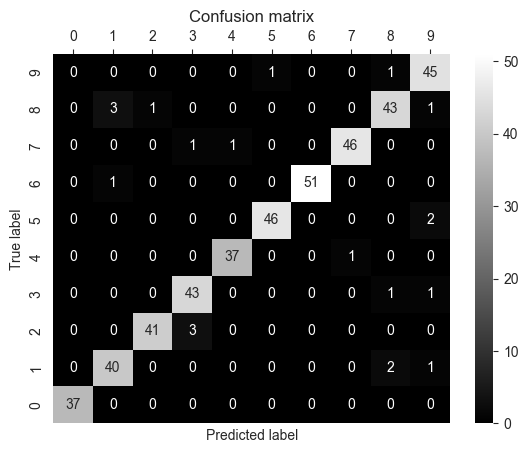

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits

# Загрузка данных
digits = load_digits()

# Построение тепловой карты матрицы неточности
ax = sns.heatmap(
    confusion_matrix(y_test, pred),
    annot=True,
    xticklabels=digits.target_names,
    yticklabels=digits.target_names,
    cmap="gray"
)

# Настройка подписей осей
ax.set(xlabel="Predicted label", ylabel="True label")
ax.xaxis.tick_top()
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

# Отображение графика
plt.show()

In [56]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [57]:
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.953
Micro average f1 score: 0.954


#### Метрики регрессии

In [58]:
# Метрика качества классификационной модели по умолчанию — правильность
print("Метрика качества по умолчанию: {}".format(cross_val_score(SVC(), digits.data, digits.target == 9)))

# Значение параметра scoring="accuracy" не меняет результатов
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy")
print("Метрика качества явно заданная правильность: {}".format(explicit_accuracy))

# Использование ROC-AUC метрики
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc")
print("Метрика качества AUC: {}".format(roc_auc))

Метрика качества по умолчанию: [0.975      0.99166667 1.         0.99442897 0.98050139]
Метрика качества явно заданная правильность: [0.975      0.99166667 1.         0.99442897 0.98050139]
Метрика качества AUC: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Разделяем данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

# Определяем сетку параметров для перебора
param_grid = {'gamma': [0.0001, 0.01, 0.1, 10]}

# Инициализация GridSearchCV с метрикой правильности
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(x_train, y_train)

# Вывод результатов
print("Решетчатый поиск с использованием правильности")
print("Наилучшие параметры:", grid.best_params_)
print("Наилучшее значение перекрёстной проверки (правильность): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(x_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(x_test, y_test)))

Решетчатый поиск с использованием правильности
Наилучшие параметры: {'gamma': 0.0001}
Наилучшее значение перекрёстной проверки (правильность): 0.976
AUC на тестовом наборе: 0.992
Правильность на тестовом наборе: 0.973


# Задание

### 2.	Используя один из подходящих игрушечных датасетов (breast_canser, digits, diabetes …) применить алгоритмы улучшения качества и оценки моделей (перекрестная проверка, решетчатый поиск, метрики модели)

In [62]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

digits = load_digits()

x_train_digits, x_test_digits, y_train_digits, y_test_digits = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42
)

# модель классификатора на основе случайного леса
rf_digits = RandomForestClassifier(random_state=42)

# обучение модели
rf_digits.fit(x_train_digits, y_train_digits)

# предсказание классов
y_pred_digits = rf_digits.predict(x_test_digits)

# оценка качества модели
print('Оценка точности набора данных:', accuracy_score(y_test_digits, y_pred_digits))
print('Матрица ошибок для набора данных:\n', confusion_matrix(y_test_digits, y_pred_digits))
print('Отчет классификации:\n', classification_report(y_test_digits, y_pred_digits))

# перекрестная проверка для оценки модели на разных подвыборках
cv_scores_digits = cross_val_score(rf_digits, digits.data, digits.target, cv=5)
print('Оценка перекрестной проверки:', cv_scores_digits)

# решетчатый поиск
param_grid_digits = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
}

grid_search_digits = GridSearchCV(rf_digits, param_grid_digits, cv=5, scoring='accuracy')
grid_search_digits.fit(x_train_digits, y_train_digits)

print('Best parameters:', grid_search_digits.best_params_)
print('Best score:', grid_search_digits.best_score_)

# новая модель с оптимальными гиперпараметрами
rf_digits_opt = RandomForestClassifier(
    n_estimators=grid_search_digits.best_params_['n_estimators'],
    max_depth=grid_search_digits.best_params_['max_depth'],
    min_samples_split=grid_search_digits.best_params_['min_samples_split'],
    random_state=42
)

# обучение новой модели
rf_digits_opt.fit(x_train_digits, y_train_digits)

# предсказание классов
y_pred_digits_opt = rf_digits_opt.predict(x_test_digits)

# оценка качества новой модели
print('Оценка точности набора данных (optimized):', accuracy_score(y_test_digits, y_pred_digits_opt))
print('Матрица ошибок для набора данных (optimized):\n', confusion_matrix(y_test_digits, y_pred_digits_opt))
print('Отчет классификации (optimized):\n', classification_report(y_test_digits, y_pred_digits_opt))

Оценка точности набора данных: 0.9722222222222222
Матрица ошибок для набора данных:
 [[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]
Отчет классификации:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.

## 3. Создать модель классификатор, которая по определенному обучаемому набору (salary, city, age, vacation_prefer, transport_prefer) будет определять предпочтения человека (target), в каком городе провести отпуск.

3 a.	Создать свой датасет с категориальными данными (1000 строк), которые содержат следующие поля: (salary, city, age, vacation_prefer, transport_prefer, target). Применить import random (random. choice, random.randint).
3 b.	Salary – установить числовой тип (например 50000), city – город проживания (например, Bishkek), age – возраст (например, от 30 до 65), vacation_prefer – тип отдыха (например, Shopping или Beach holiday), transport_prefer – тип транспорта (например, auto, plane), target – город, в котором проведем отпуск (например, London, Moscow)

In [66]:
import pandas as pd
import random

salary_list = [50000, 55000, 60000, 70000, 80000, 90000, 100000, 120000, 150000]
city_list = ['Bishkek', 'Osh', 'Jalal-Abad', 'Karakol', 'Tokmok', 'Naryn']
age_list = list(range(25, 66))  # Возраст от 25 до 65
vacation_prefer_list = ['Shopping', 'Beach holiday', 'Skiing', 'Hiking', 'Cultural tour', 'Relaxing']
transport_prefer_list = ['auto', 'plane', 'train', 'bus']
target_list = ['London', 'Moscow', 'Paris', 'New York', 'Dubai', 'Tokyo']

# пустой датафрейм с нужными колонками
vacation_df = pd.DataFrame(columns=['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target'])

for i in range(1000):
    salary = random.choices(
        salary_list,
        weights=[5, 10, 20, 25, 20, 10, 5, 3, 2],
        k=1
    )[0]  # большинство людей имеет зарплату от 60000 до 90000
    city = random.choices(
        city_list,
        weights=[30, 25, 20, 10, 10, 5],
        k=1
    )[0]  # наибольшая вероятность для Bishkek и Osh
    age = random.randint(25, 65)
    vacation_prefer = random.choices(
        vacation_prefer_list,
        weights=[15, 20, 10, 25, 20, 10],
        k=1
    )[0]  # большинство предпочитают пляжный отдых или походы
    transport_prefer = random.choices(
        transport_prefer_list,
        weights=[30, 40, 15, 15],
        k=1
    )[0]  # самолет выбирают чаще
    target = random.choices(
        target_list,
        weights=[20, 25, 15, 10, 20, 10],
        k=1
    )[0]  # Москва, Дубай и Лондон наиболее популярны

    vacation_df.loc[i] = [salary, city, age, vacation_prefer, transport_prefer, target]

vacation_df.head()

,salary,city,age,vacation_prefer,transport_prefer,target
0,80000,Osh,29,Hiking,auto,Paris
1,90000,Naryn,50,Shopping,plane,Paris
2,60000,Osh,28,Shopping,auto,Dubai
3,120000,Bishkek,28,Cultural tour,auto,Moscow
4,50000,Karakol,34,Hiking,plane,Paris


3 c.	Преобразовать категориальные данные в числовые, используя panadas.get_dummiesc.	Преобразовать категориальные данные в числовые, используя panadas.get_dummies

In [69]:
import pandas as pd
import random

salary_list = [50000, 55000, 60000, 70000, 80000, 90000, 100000, 120000, 150000]
city_list = ['Bishkek', 'Osh', 'Jalal-Abad', 'Karakol', 'Tokmok', 'Naryn']
age_list = list(range(25, 66))  # Возраст от 25 до 65
vacation_prefer_list = ['Shopping', 'Beach holiday', 'Skiing', 'Hiking', 'Cultural tour', 'Relaxing']
transport_prefer_list = ['auto', 'plane', 'train', 'bus']
target_list = ['London', 'Moscow', 'Paris', 'New York', 'Dubai', 'Tokyo']

# пустой датафрейм с нужными колонками
vacation_df = pd.DataFrame(columns=['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target'])

for i in range(1000):
    salary = random.choices(
        salary_list,
        weights=[5, 10, 20, 25, 20, 10, 5, 3, 2],
        k=1
    )[0]  # большинство людей имеет зарплату от 60000 до 90000
    city = random.choices(
        city_list,
        weights=[30, 25, 20, 10, 10, 5],
        k=1
    )[0]  # наибольшая вероятность для Bishkek и Osh
    age = random.randint(25, 65)
    vacation_prefer = random.choices(
        vacation_prefer_list,
        weights=[15, 20, 10, 25, 20, 10],
        k=1
    )[0]  # большинство предпочитают пляжный отдых или походы
    transport_prefer = random.choices(
        transport_prefer_list,
        weights=[30, 40, 15, 15],
        k=1
    )[0]  # самолет выбирают чаще
    target = random.choices(
        target_list,
        weights=[20, 25, 15, 10, 20, 10],
        k=1
    )[0]  # Москва, Дубай и Лондон наиболее популярны

    vacation_df.loc[i] = [salary, city, age, vacation_prefer, transport_prefer, target]

vacation_df = pd.get_dummies(vacation_df, columns=['city', 'vacation_prefer', 'transport_prefer'])

vacation_df.head()

,salary,age,target,city_Bishkek,city_Jalal-Abad,city_Karakol,city_Naryn,city_Osh,city_Tokmok,vacation_prefer_Beach holiday,vacation_prefer_Cultural tour,vacation_prefer_Hiking,vacation_prefer_Relaxing,vacation_prefer_Shopping,vacation_prefer_Skiing,transport_prefer_auto,transport_prefer_bus,transport_prefer_plane,transport_prefer_train
0,60000,36,London,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1,60000,47,Paris,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False
2,55000,28,Paris,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False
3,70000,28,Dubai,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
4,60000,36,Moscow,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False


3 d.	Выделить обучающую выборку и тестовую выборку (x_train, y_train, x_test, y_test)

In [70]:
from sklearn.model_selection import train_test_split

x = vacation_df.drop('target', axis=1)
y = vacation_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

3 e.	Выбрать модель классификатор (например, from sklearn.ensemble import RandomForestClassifier)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_rf = RandomForestClassifier(n_estimators=100, random_state=0)

model_rf.fit(x_train, y_train)

y_pred = model_rf.predict(x_test)

3 f.	Проверить оценку модели.

In [73]:
print("Оценка точности набора данных:", accuracy_score(y_test, y_pred))
print("\nМатрица ошибок:\n", confusion_matrix(y_test, y_pred))
print("\nОтчет классификации:\n", classification_report(y_test, y_pred))

Оценка точности набора данных: 0.175

Матрица ошибок:
 [[ 7  7  9  8 10  1]
 [ 8  7 13  3  1  2]
 [17 10 10  2  7  2]
 [ 3  3  5  1  0  2]
 [ 8  4 14  4  7  1]
 [ 7  5  8  1  0  3]]

Отчет классификации:
               precision    recall  f1-score   support

       Dubai       0.14      0.17      0.15        42
      London       0.19      0.21      0.20        34
      Moscow       0.17      0.21      0.19        48
    New York       0.05      0.07      0.06        14
       Paris       0.28      0.18      0.22        38
       Tokyo       0.27      0.12      0.17        24

    accuracy                           0.17       200
   macro avg       0.18      0.16      0.17       200
weighted avg       0.19      0.17      0.18       200



3 g.	Сделать предсказание на случайных данных.

In [81]:
random_data = pd.DataFrame(columns=x.columns)

random_data.loc[0] = (
    [random.choice(salary_list), random.randint(25, 65)] # salary и age
    + [random.randint(0, 1) for _ in range(len(random_data.columns) - 2)]
)
# print(random_data)

random_pred = model_rf.predict(random_data)

print('Предсказанный класс: ', random_pred[0])

Предсказанный класс:  Dubai


3 h.	Улучшить модель согласно примерам лекций 9-10 и материала лабораторной работы

In [86]:
cv_scores = cross_val_score(model_rf, x, y, cv=5)
print('Cross-validation scores:', cv_scores)

# решетчатый поиск
param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 8]}
grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.26
Cross-validation scores: [0.235 0.205 0.21  0.185 0.18 ]
Best parameters: {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.26


In [87]:
model_rf_optimized = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'], random_state=42)
# Обучаем новую модель на обучающей выборке
model_rf_optimized.fit(x_train, y_train)
# Предсказываем классы для тестовой выборки
y_pred_optimized = model_rf_optimized.predict(x_test)
# Оцениваем качество новой модели с помощью метрик
print('Оценка точности набора данных (optimized):', accuracy_score(y_test, y_pred_optimized))
print('Матрица ошибок (optimized):\n', confusion_matrix(y_test, y_pred_optimized))
print('Отчет классификации (optimized):\n', classification_report(y_test, y_pred_optimized, zero_division=1))

Оценка точности набора данных (optimized): 0.24
Матрица ошибок (optimized):
 [[ 0  0 42  0  0  0]
 [ 0  0 34  0  0  0]
 [ 0  0 48  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0 38  0  0  0]
 [ 0  0 24  0  0  0]]
Отчет классификации (optimized):
               precision    recall  f1-score   support

       Dubai       1.00      0.00      0.00        42
      London       1.00      0.00      0.00        34
      Moscow       0.24      1.00      0.39        48
    New York       1.00      0.00      0.00        14
       Paris       1.00      0.00      0.00        38
       Tokyo       1.00      0.00      0.00        24

    accuracy                           0.24       200
   macro avg       0.87      0.17      0.06       200
weighted avg       0.82      0.24      0.09       200



# Вывод


В ходе лабораторной работы я изучил методы оценки качества модели на примерах и материалах, включая работу с датасетом iris. Я применил алгоритмы улучшения качества и оценки моделей, такие как перекрестная проверка, решетчатый поиск и использование метрик, на сгенерированном мной датасете, который содержит данные о зарплате, городе проживания, возрасте, предпочтениях отдыха и транспорте. Целью модели было предсказать, в каком городе человек предпочтет провести отпуск.

Я создал датасет с категориальными данными, преобразовал их в числовые с помощью, разделил на обучающую и тестовую выборки, обучил модель классификатора и оценил её производительность. Также я сделал предсказание на случайных данных для проверки модели. Для улучшения модели использовал перекрестную проверку и решетчатый поиск гиперпараметров. После оптимизации качество модели улучшилось: точность увеличилась с 0.175 до 0.24.